# BharatViz Demo - Minimal Code Examples

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/saketkc/bharatviz/blob/main/server/examples/bharatviz_demo.ipynb)

This notebook demonstrates how to use BharatViz API with minimal code.

## Installation

Run this cell to install dependencies and download the BharatViz client:

In [ ]:
# Install dependencies
!pip install requests pillow pandas matplotlib -q

# Download the BharatViz Python client
!wget -q https://raw.githubusercontent.com/saketkc/bharatviz/main/server/examples/bharatviz.py

# Import the BharatViz client
from bharatviz import BharatViz, quick_map
import pandas as pd

# Initialize with deployed API
BharatViz._default_api_url = "http://bharatviz.saketlab.in/api"
print("✅ Connected to http://bharatviz.saketlab.in/api")

---

## 1️⃣ Quickest Way - One Line!

Use `quick_map()` to generate and display a map instantly.

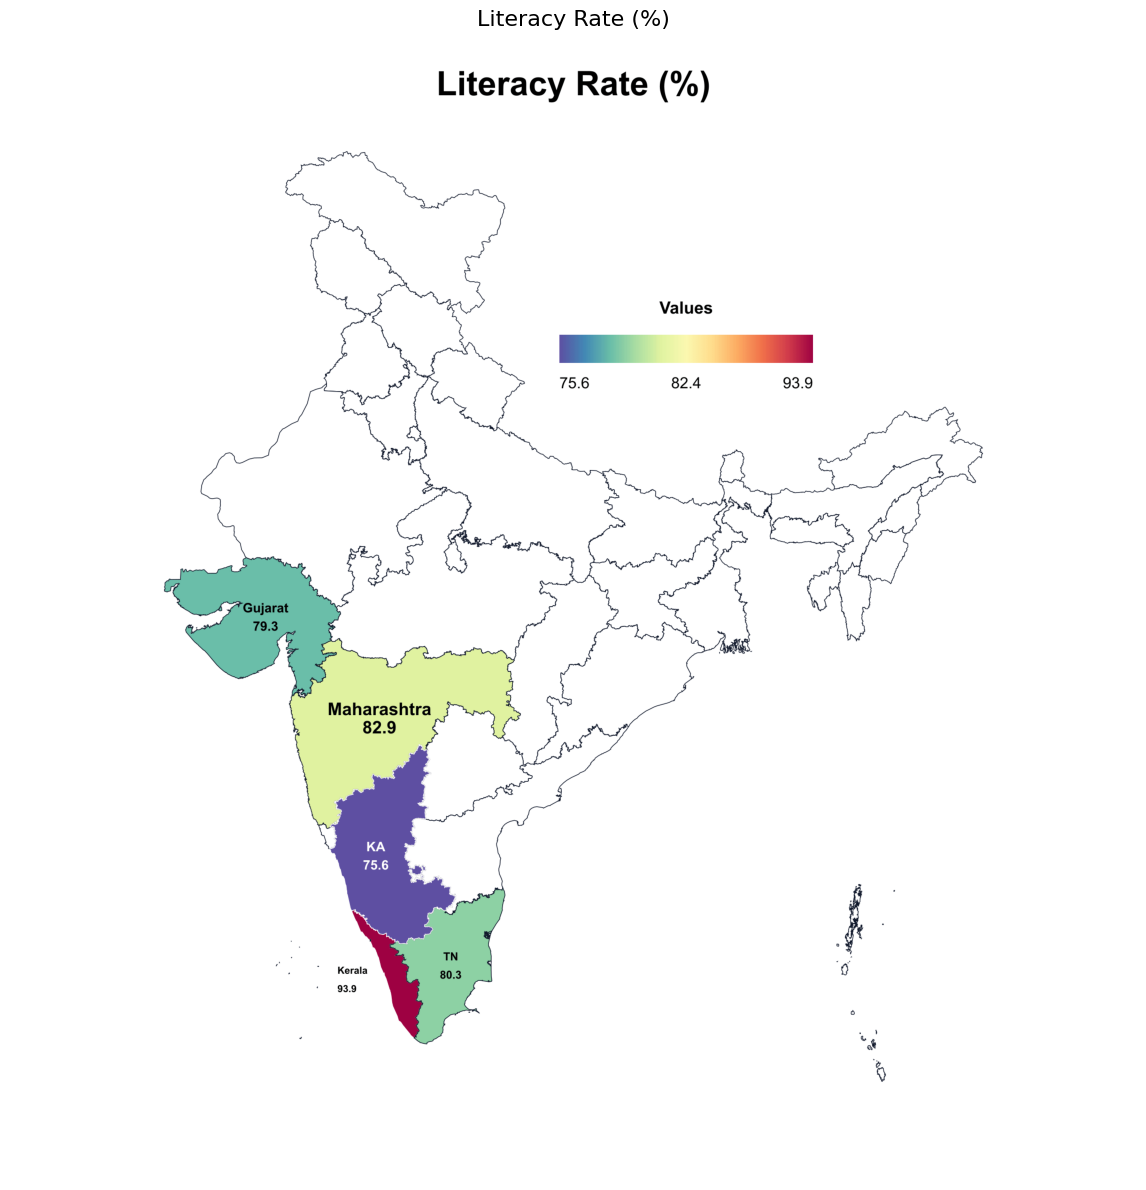

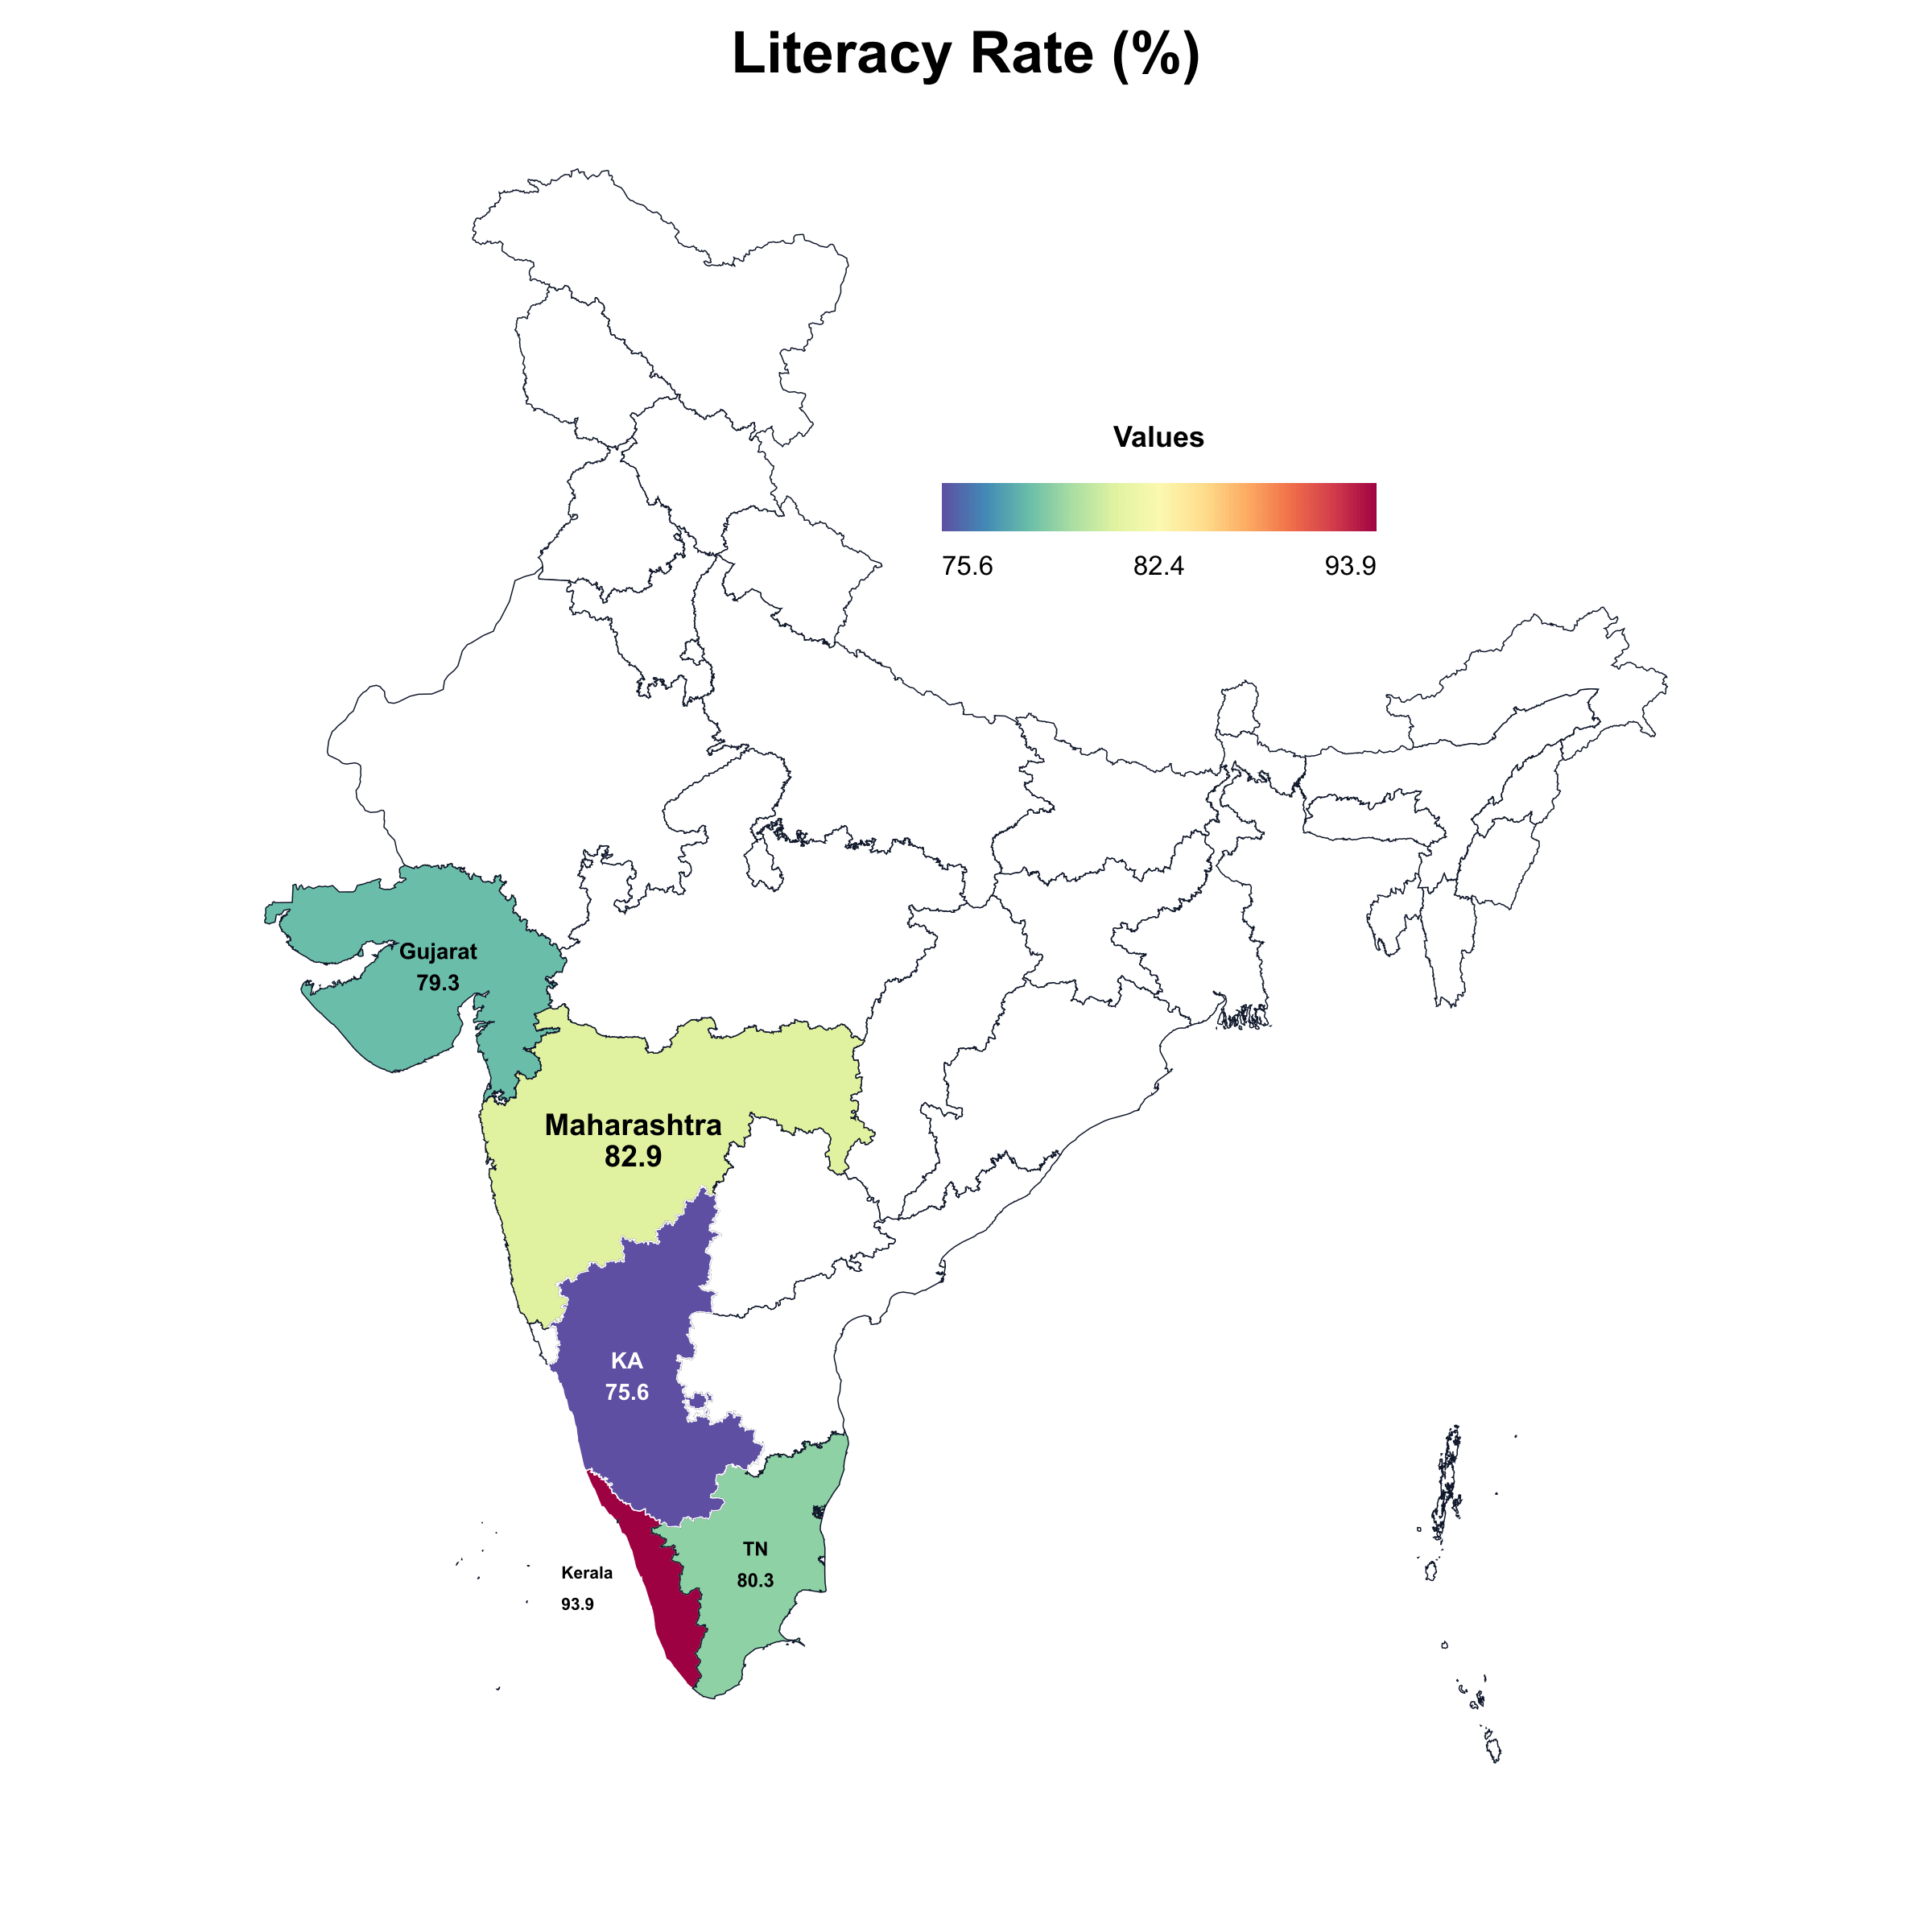

In [2]:
# Simplest possible usage - just pass a dictionary!
data = {
    "Maharashtra": 82.9,
    "Kerala": 93.9,
    "Karnataka": 75.6,
    "Tamil Nadu": 80.3,
    "Gujarat": 79.3,
}

quick_map(BharatViz.from_dict(data), title="Literacy Rate (%)")

---

## 2️⃣ From Pandas DataFrame - Auto Convert!

Working with a DataFrame? Just pass it directly!

In [3]:
# Create a DataFrame
df = pd.DataFrame(
    {
        "state": [
            "Maharashtra",
            "Kerala",
            "Karnataka",
            "Tamil Nadu",
            "Gujarat",
            "Rajasthan",
        ],
        "population_million": [112.4, 33.4, 61.1, 72.1, 60.4, 68.5],
    }
)

print(df)

         state  population_million
0  Maharashtra               112.4
1       Kerala                33.4
2    Karnataka                61.1
3   Tamil Nadu                72.1
4      Gujarat                60.4
5    Rajasthan                68.5


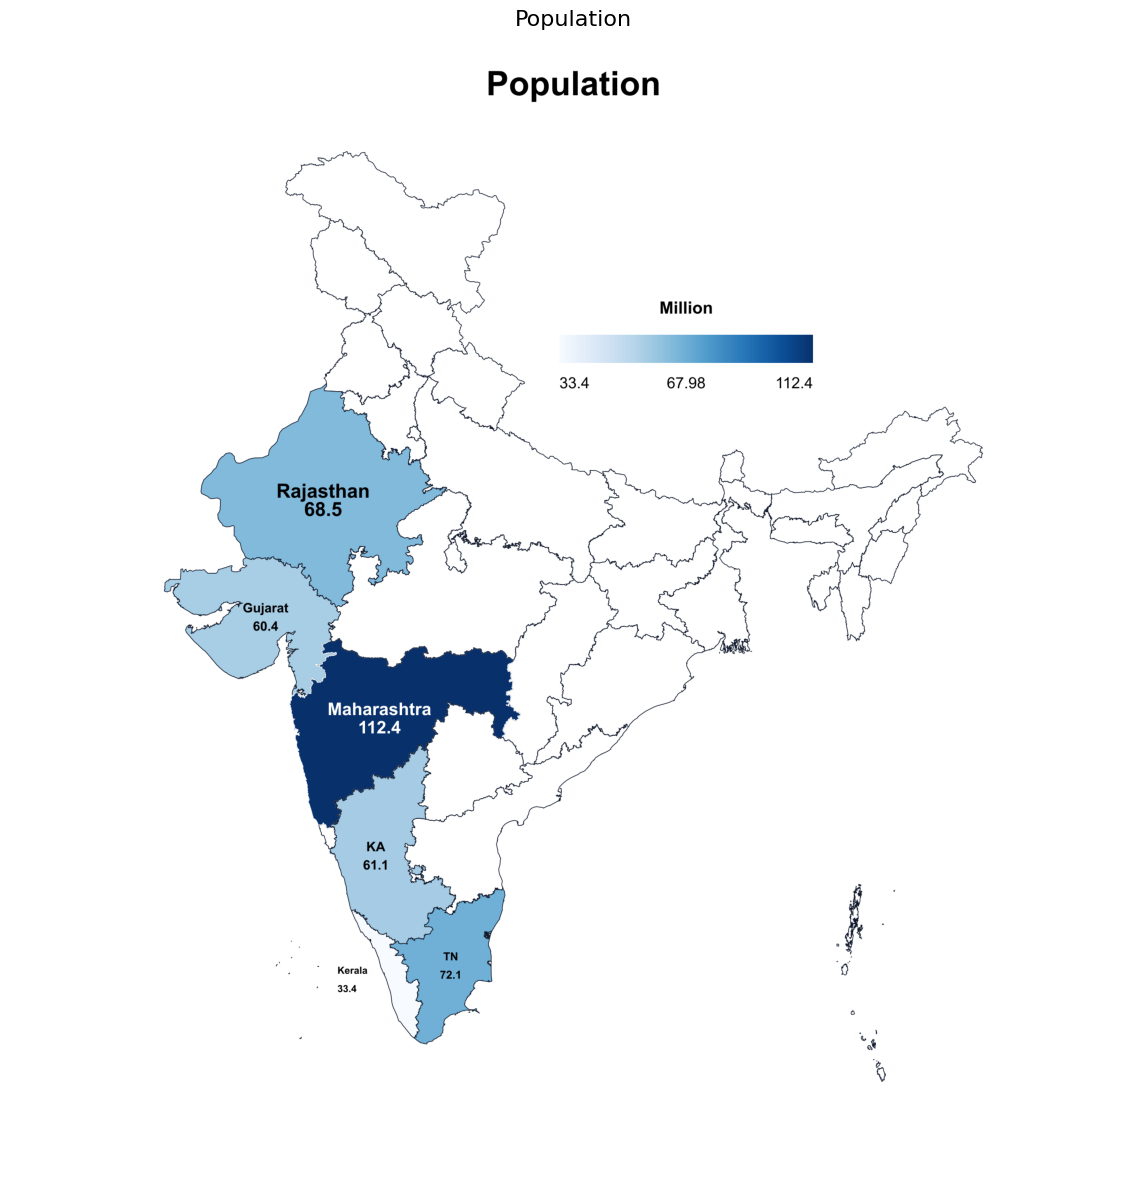

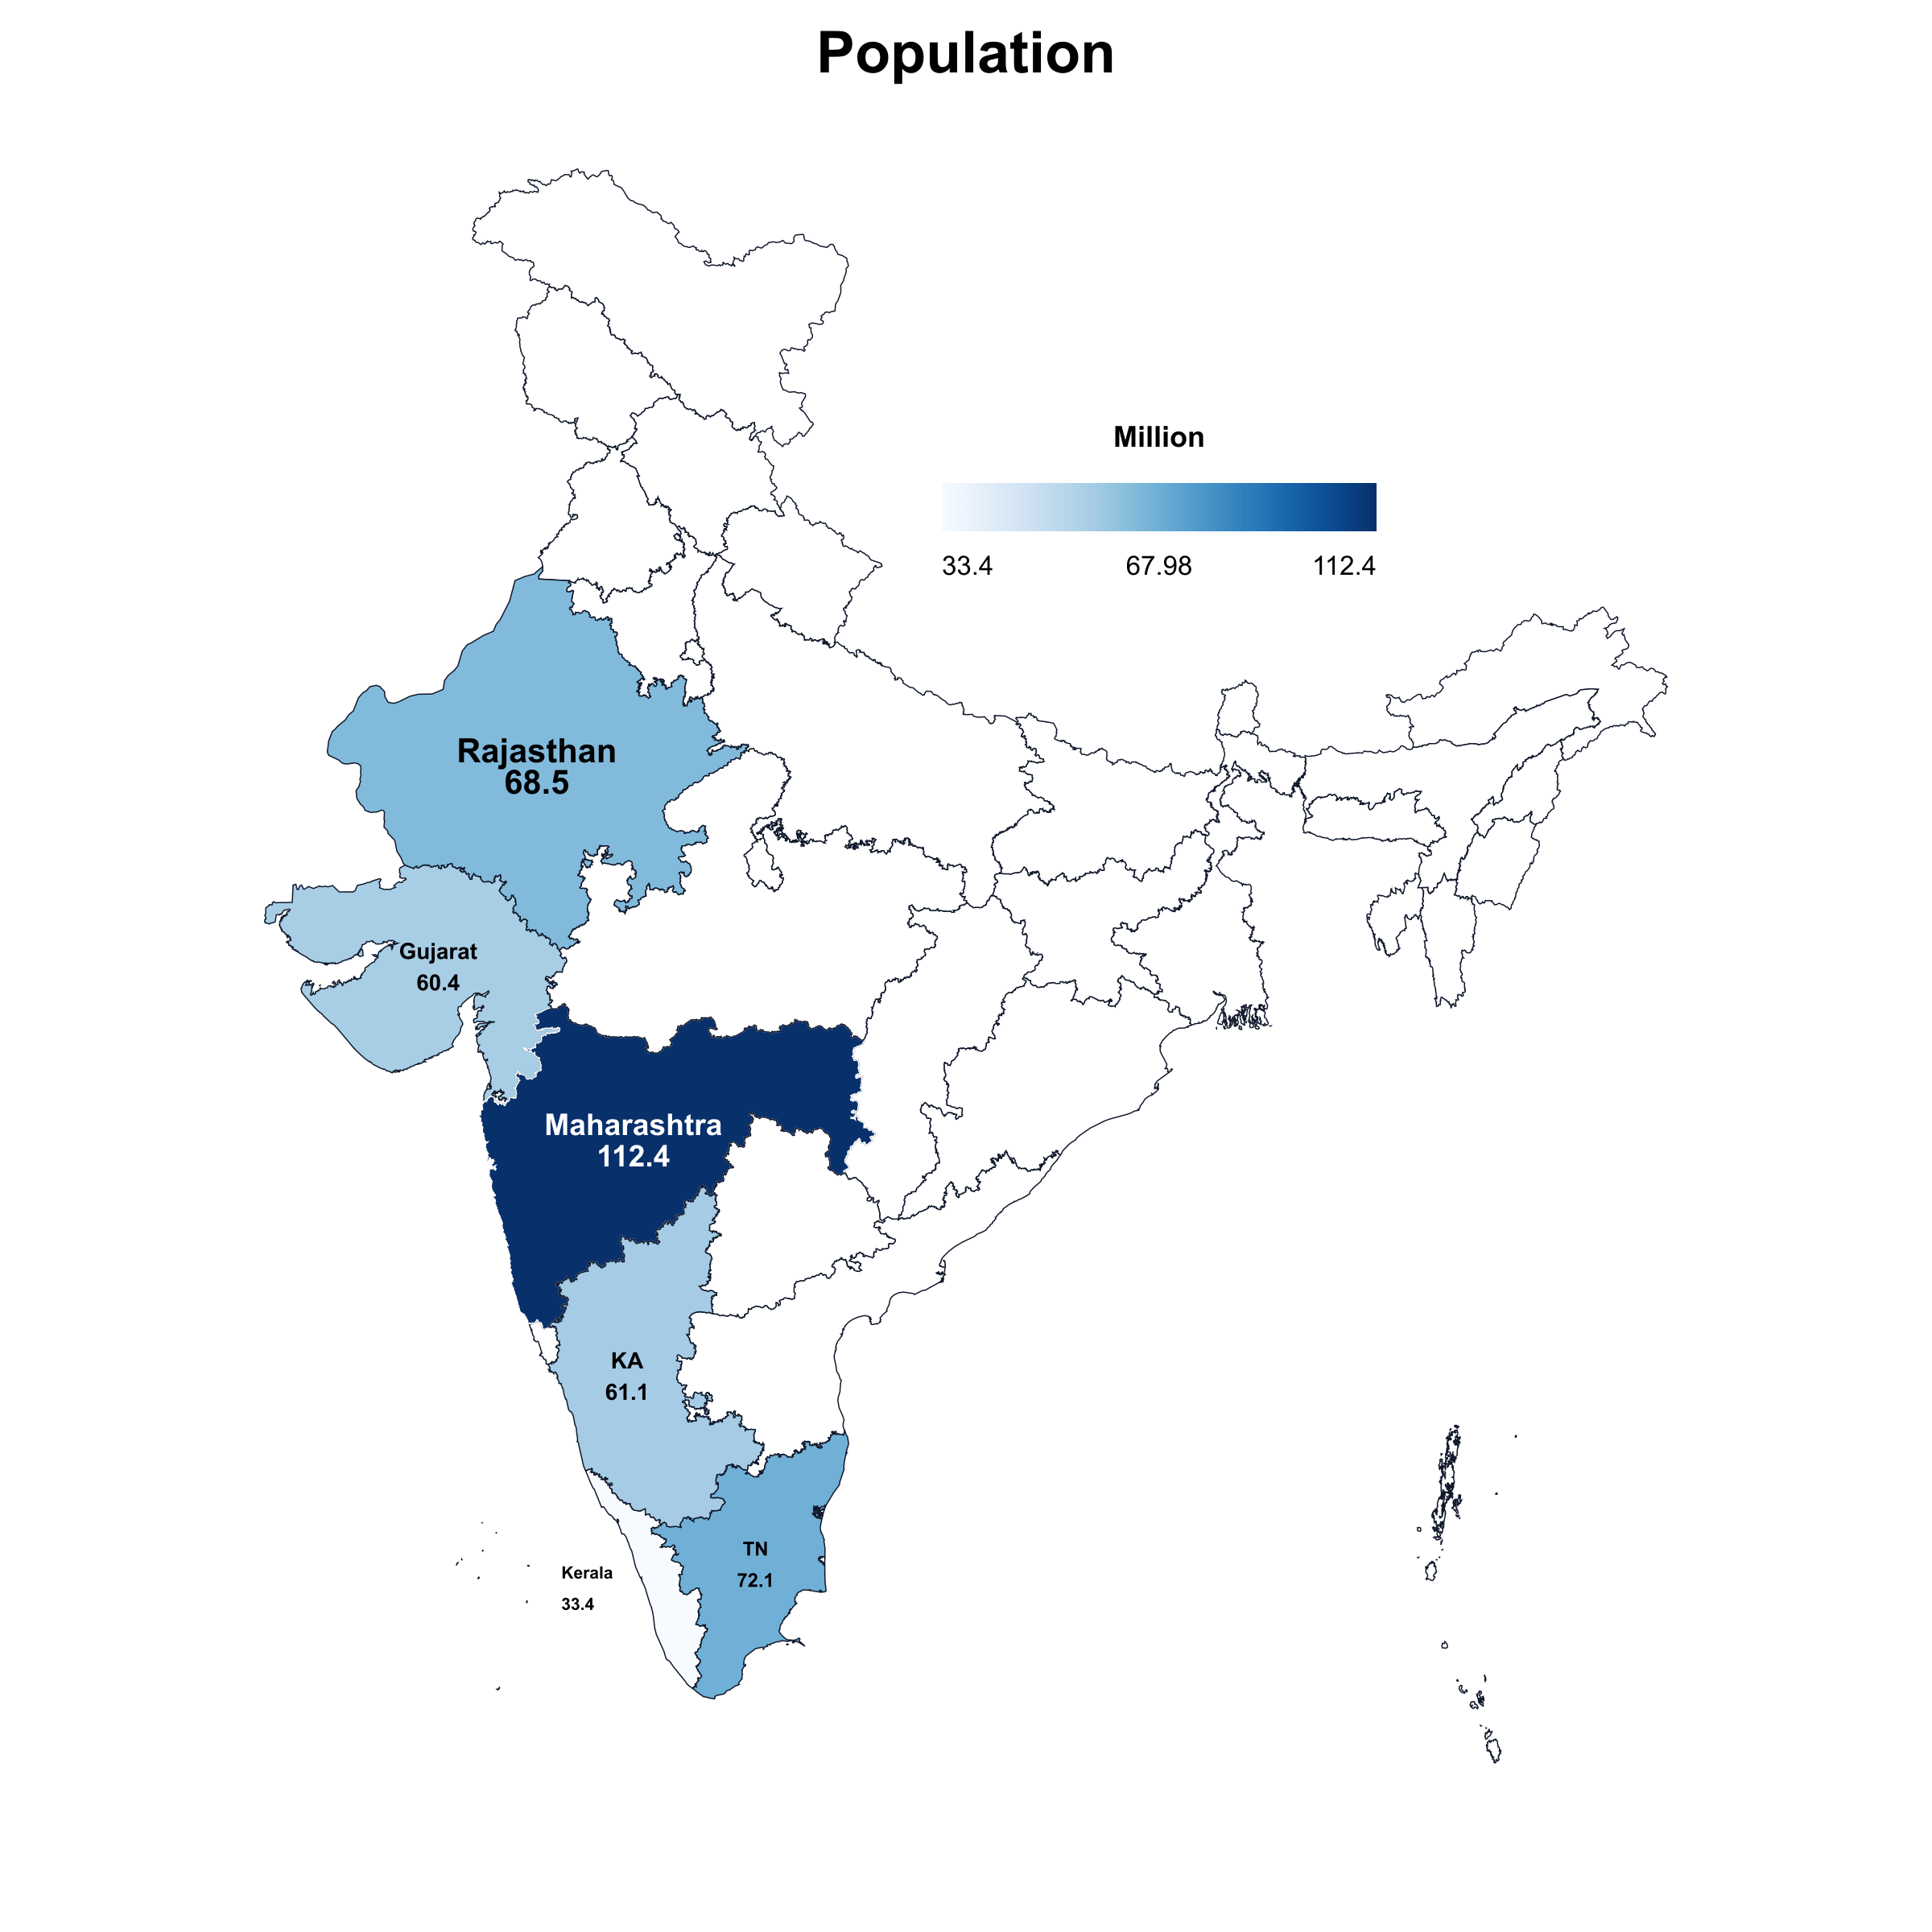

In [4]:
# Initialize client
bv = BharatViz()

# Pass DataFrame directly - it auto-converts!
bv.generate_map(
    df, title="Population", legend_title="Million", color_scale="blues", show=True
)

---

## 3️⃣ Custom Column Names? No Problem!

If your DataFrame has different column names, use the helper function.

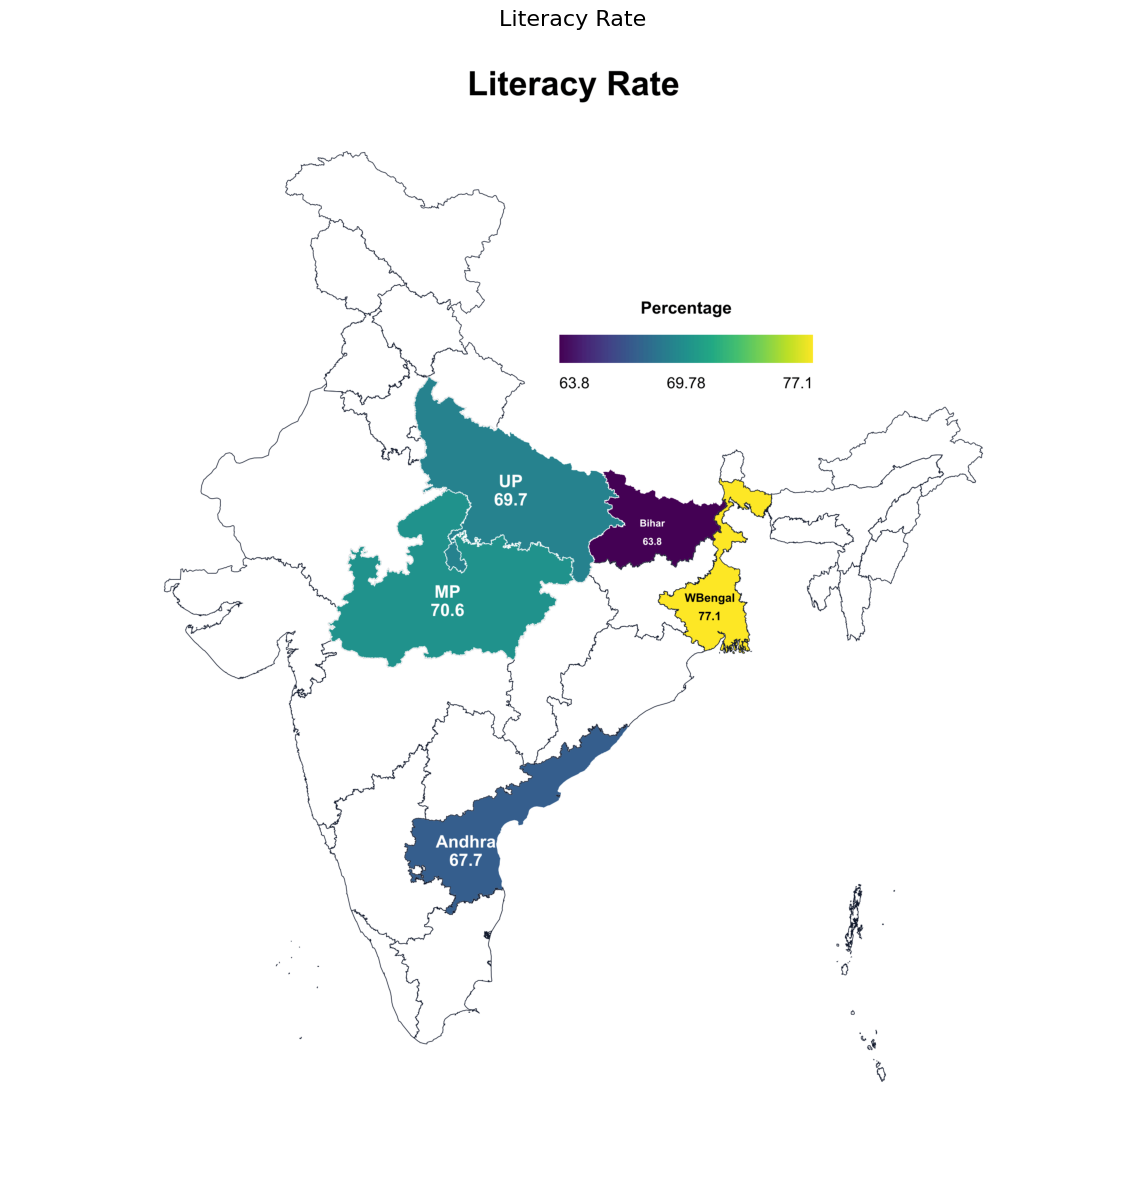

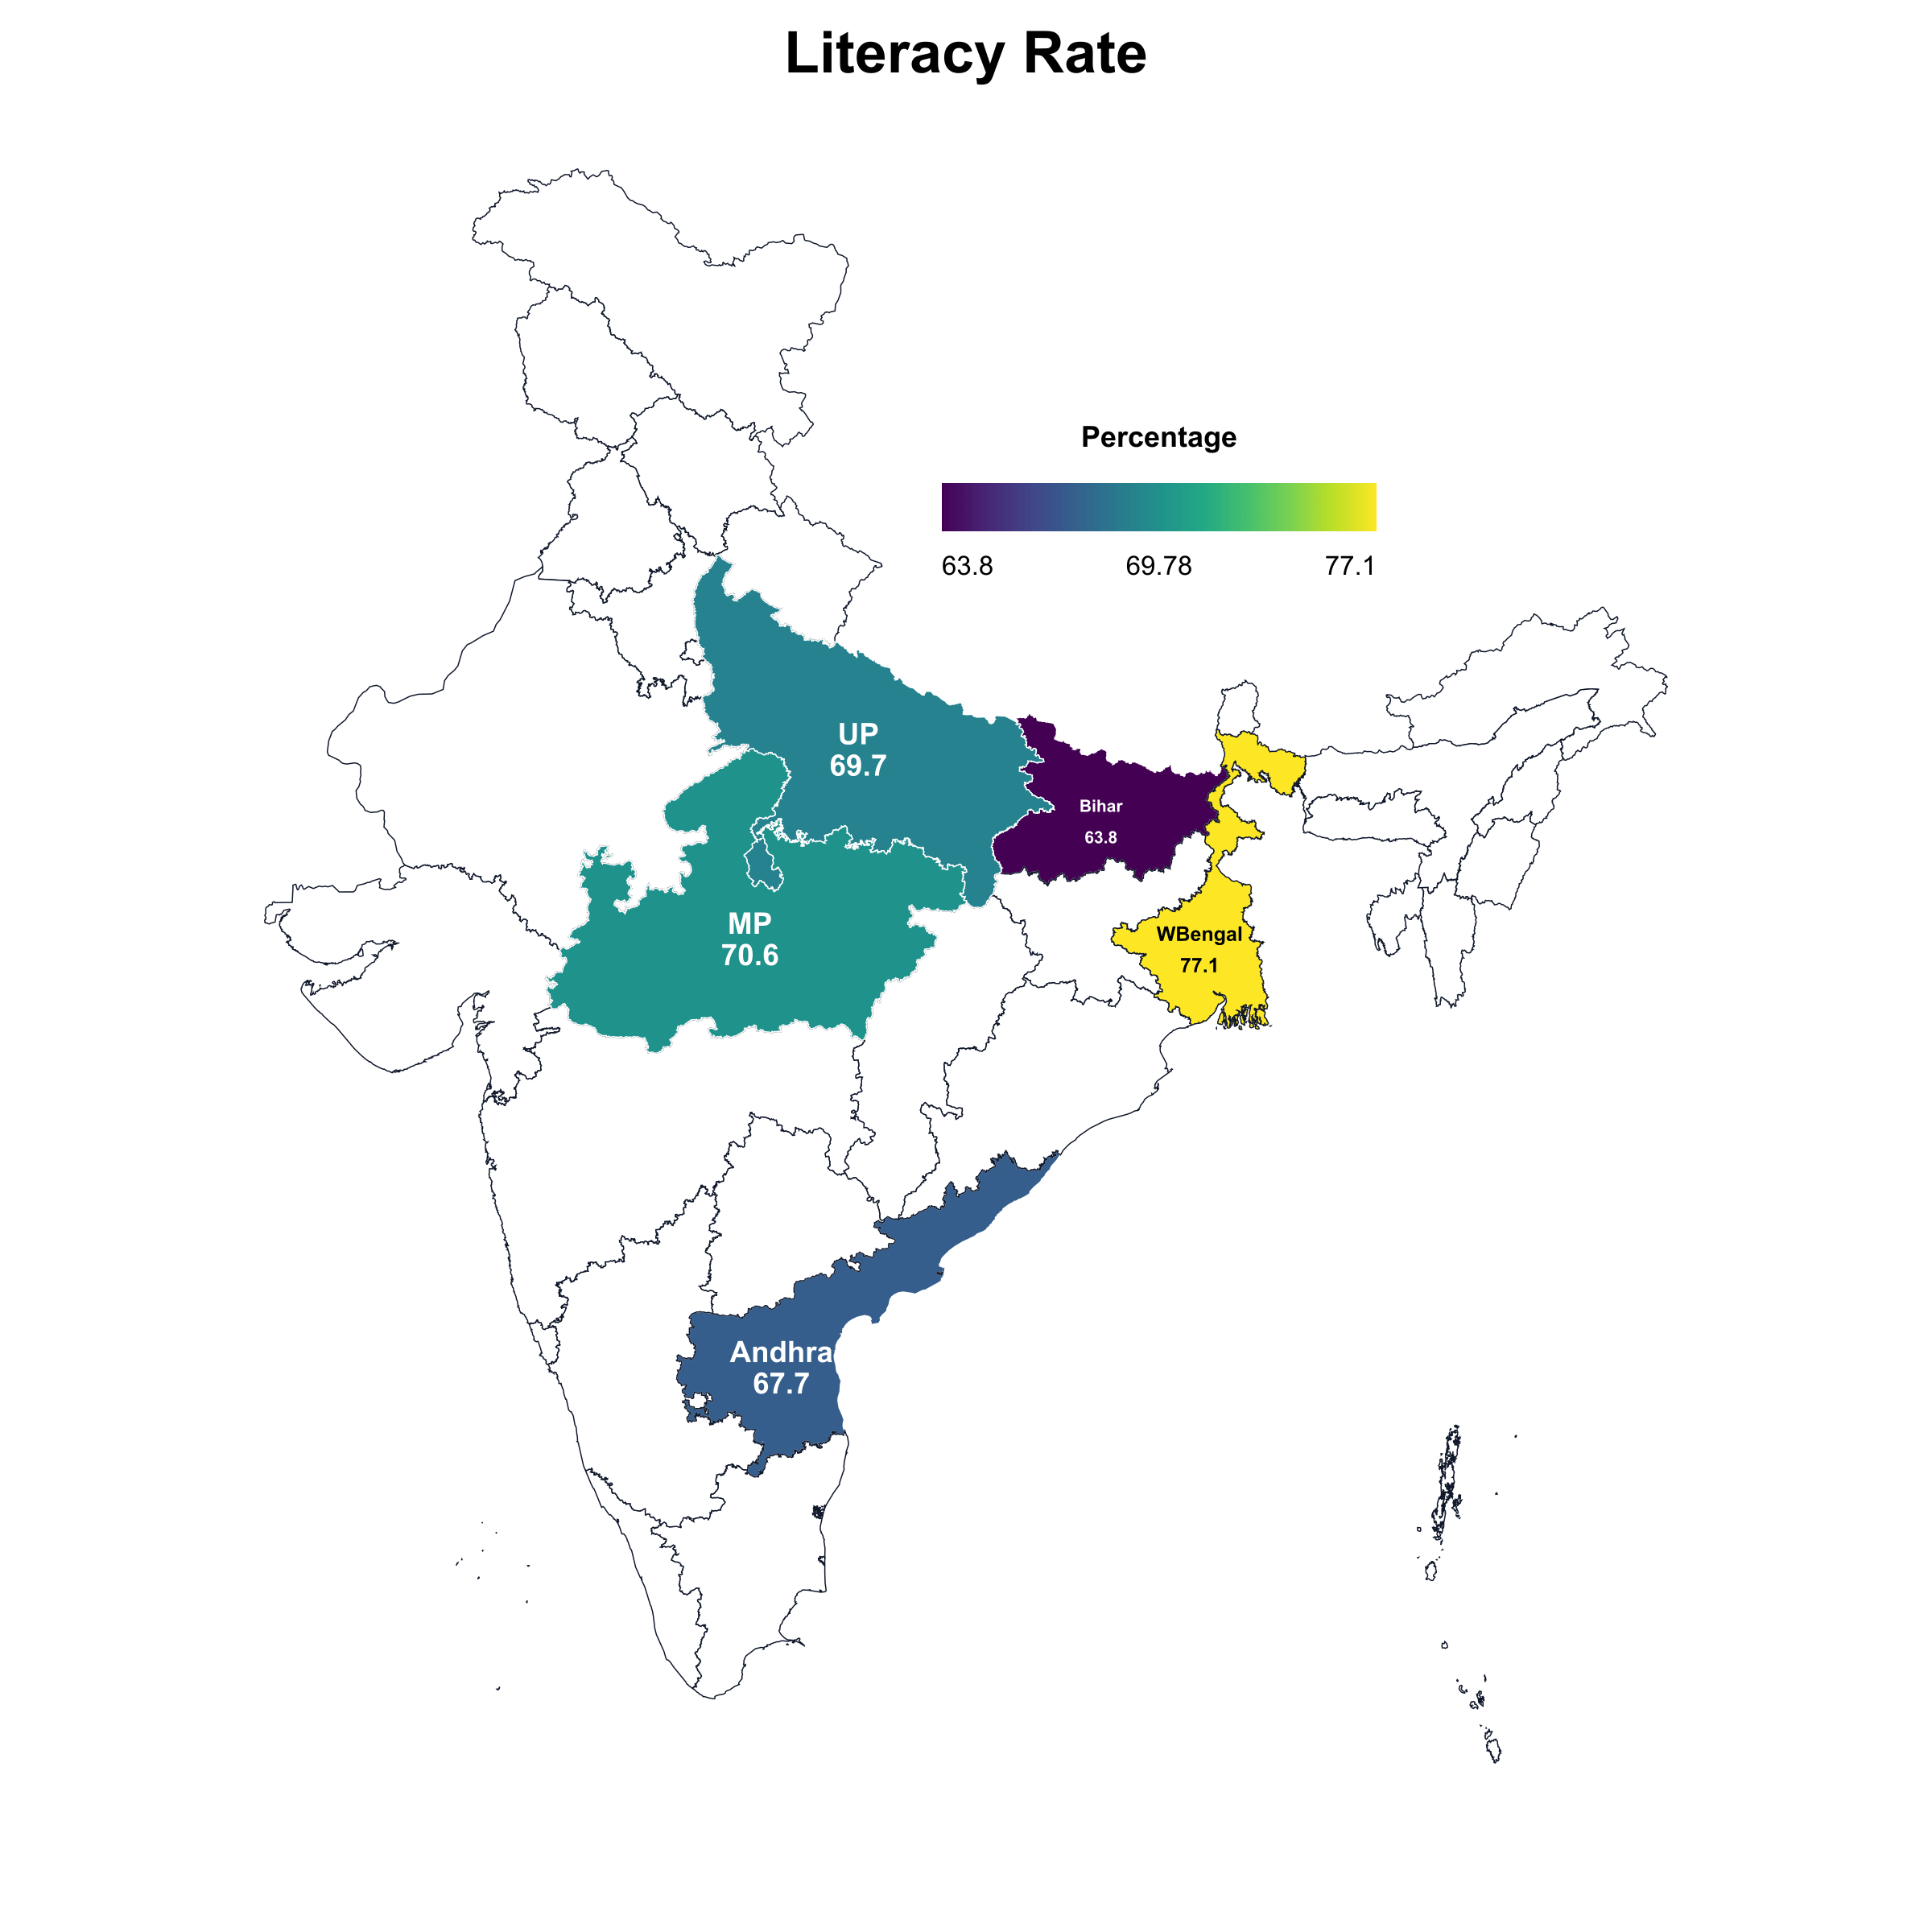

In [5]:
# DataFrame with custom column names
df_custom = pd.DataFrame(
    {
        "state_name": [
            "Uttar Pradesh",
            "Bihar",
            "West Bengal",
            "Madhya Pradesh",
            "Andhra Pradesh",
        ],
        "literacy_rate": [69.7, 63.8, 77.1, 70.6, 67.7],
    }
)

# Convert using helper function
data = BharatViz.from_dataframe(
    df_custom, state_col="state_name", value_col="literacy_rate"
)

# Generate map
bv.generate_map(
    data,
    title="Literacy Rate",
    legend_title="Percentage",
    color_scale="viridis",
    show=True,
)

---

## 4️⃣ Save Maps - One Line!

Save to PNG, SVG, or PDF with minimal code.

✅ Map saved to: my_map.png


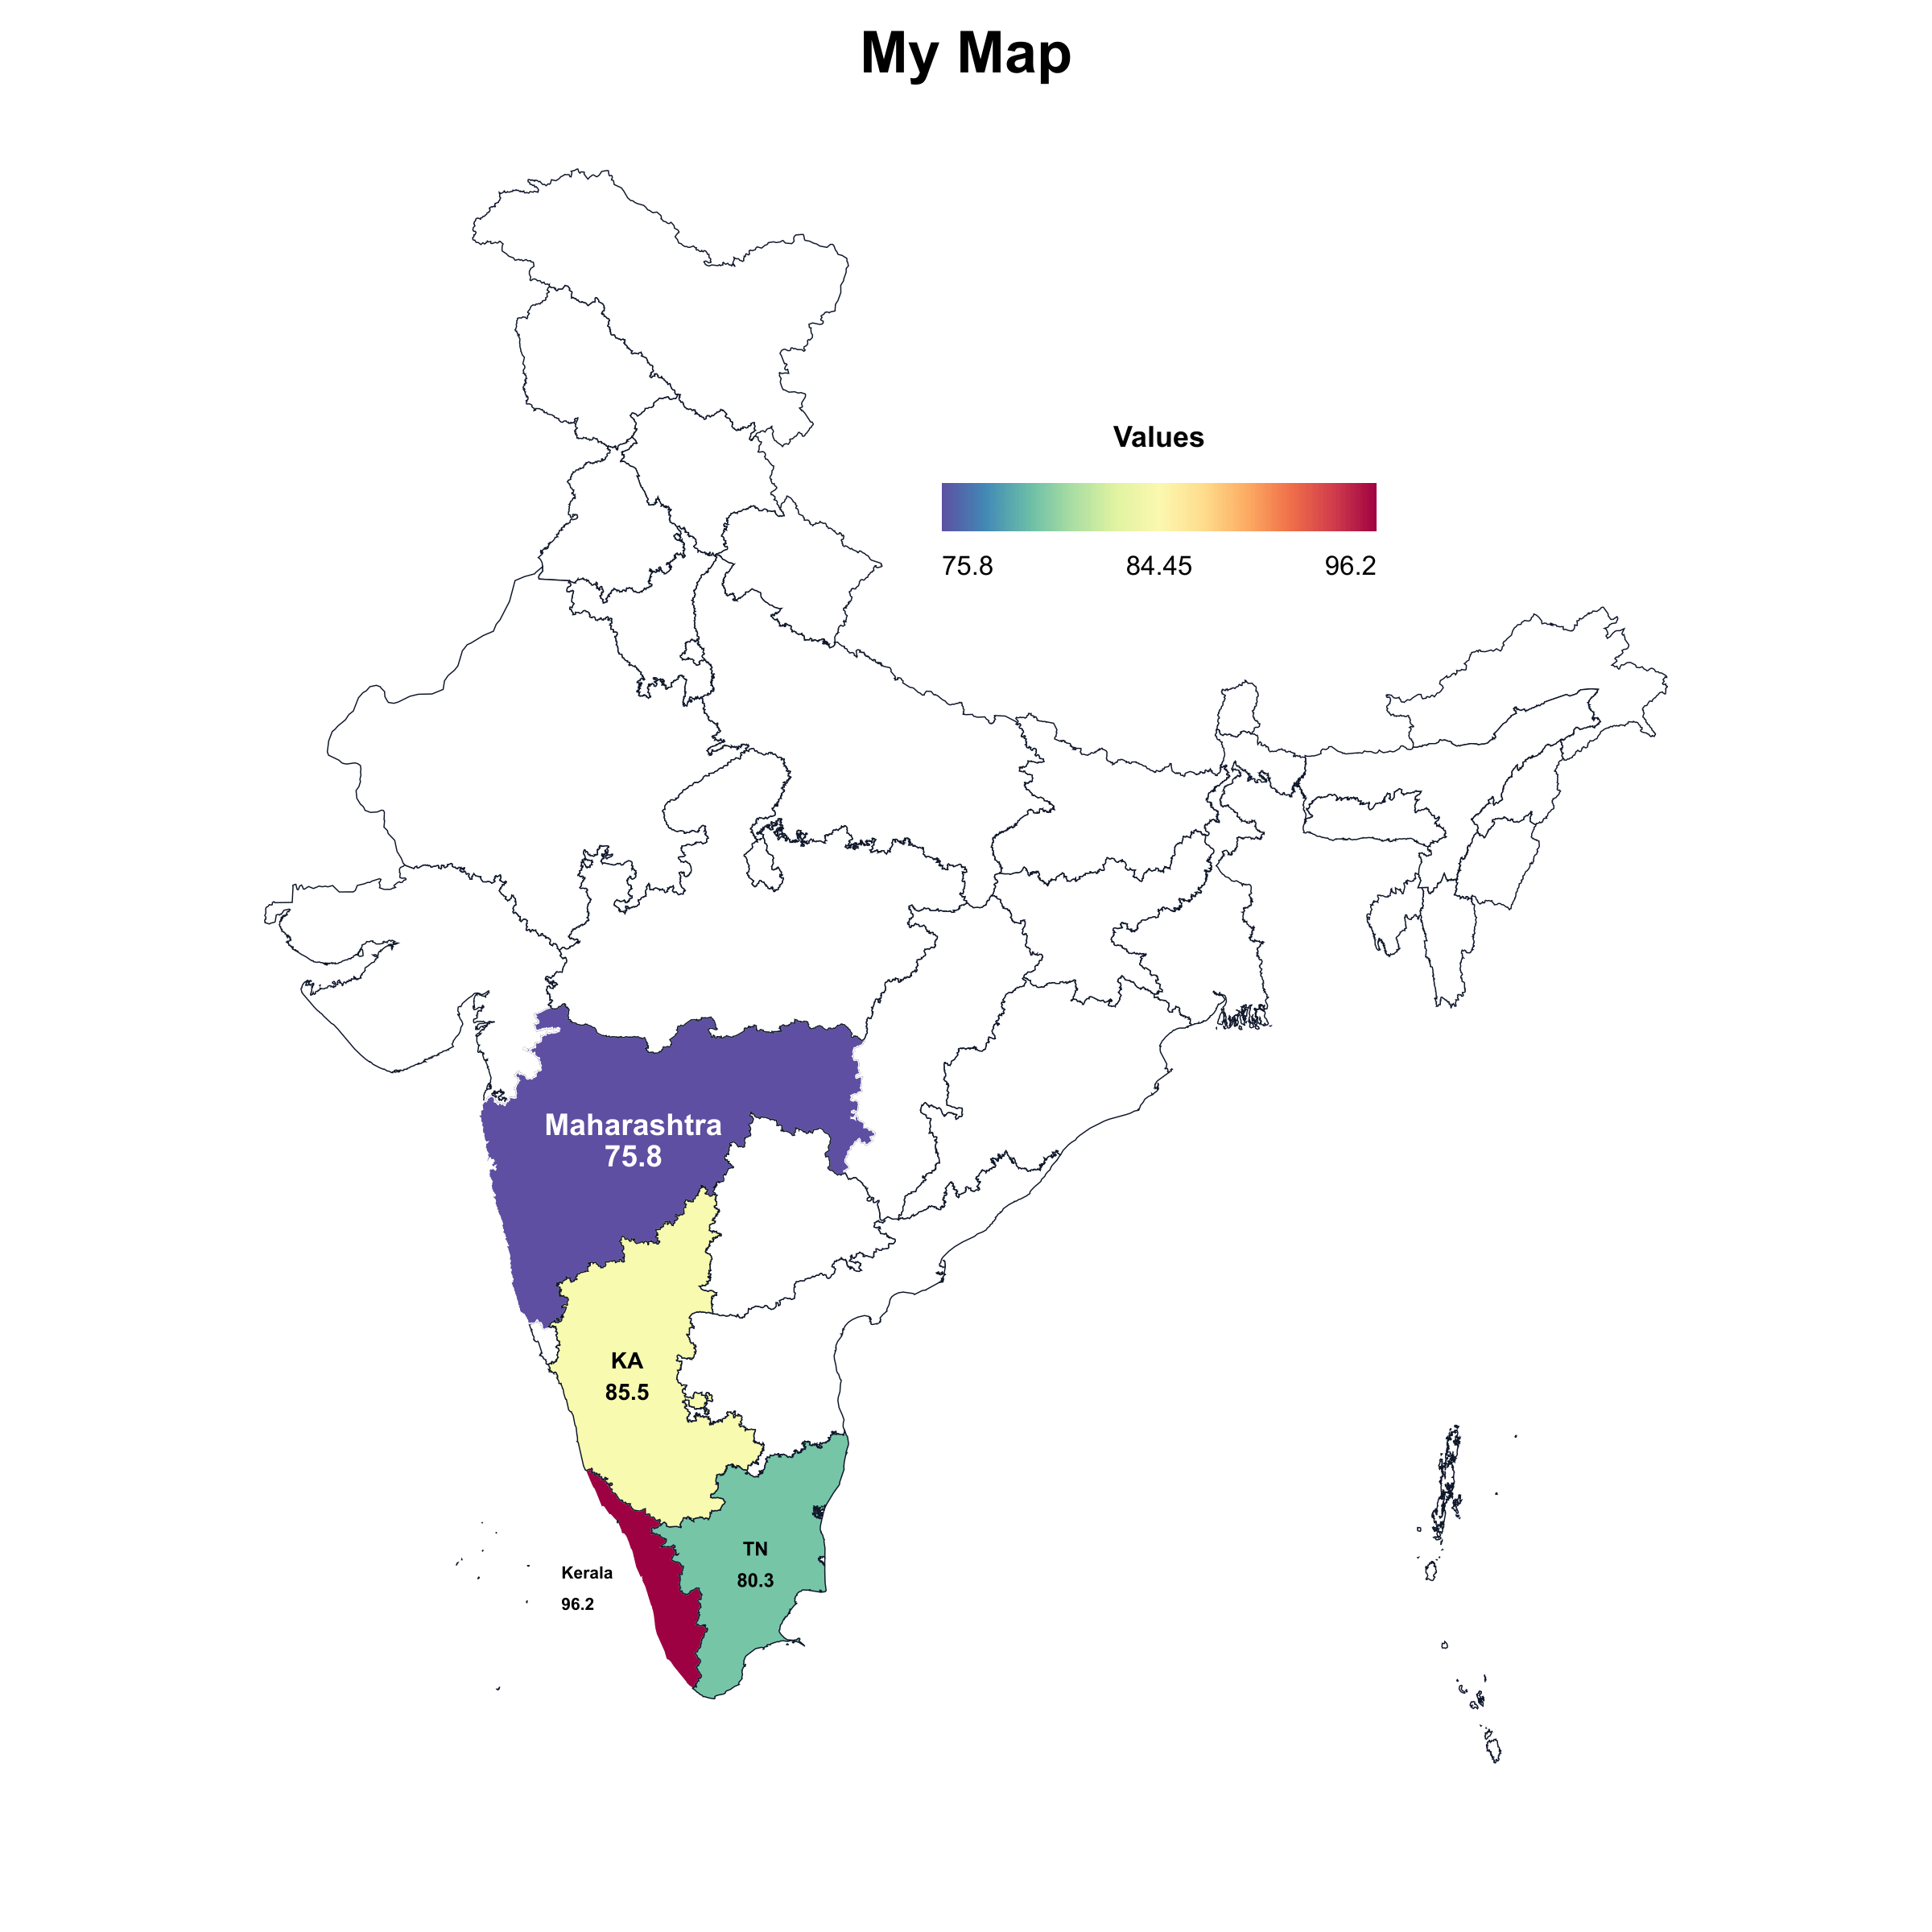

In [6]:
# Sample data
data = [
    {"state": "Maharashtra", "value": 75.8},
    {"state": "Karnataka", "value": 85.5},
    {"state": "Kerala", "value": 96.2},
    {"state": "Tamil Nadu", "value": 80.3},
]

# Save PNG
bv.generate_map(data, title="My Map", save_path="my_map.png")

In [7]:
# Save ALL formats (PNG, SVG, PDF) at once!
bv.save_all_formats(
    data, basename="india_map", title="Multi-Format Export", color_scale="plasma"
)

✅ Saved india_map.png (125.57 KB)
✅ Saved india_map.svg (495.50 KB)
✅ Saved india_map.pdf (128.76 KB)


---

## 5️⃣ Try Different Color Scales

Compare multiple color scales side-by-side.

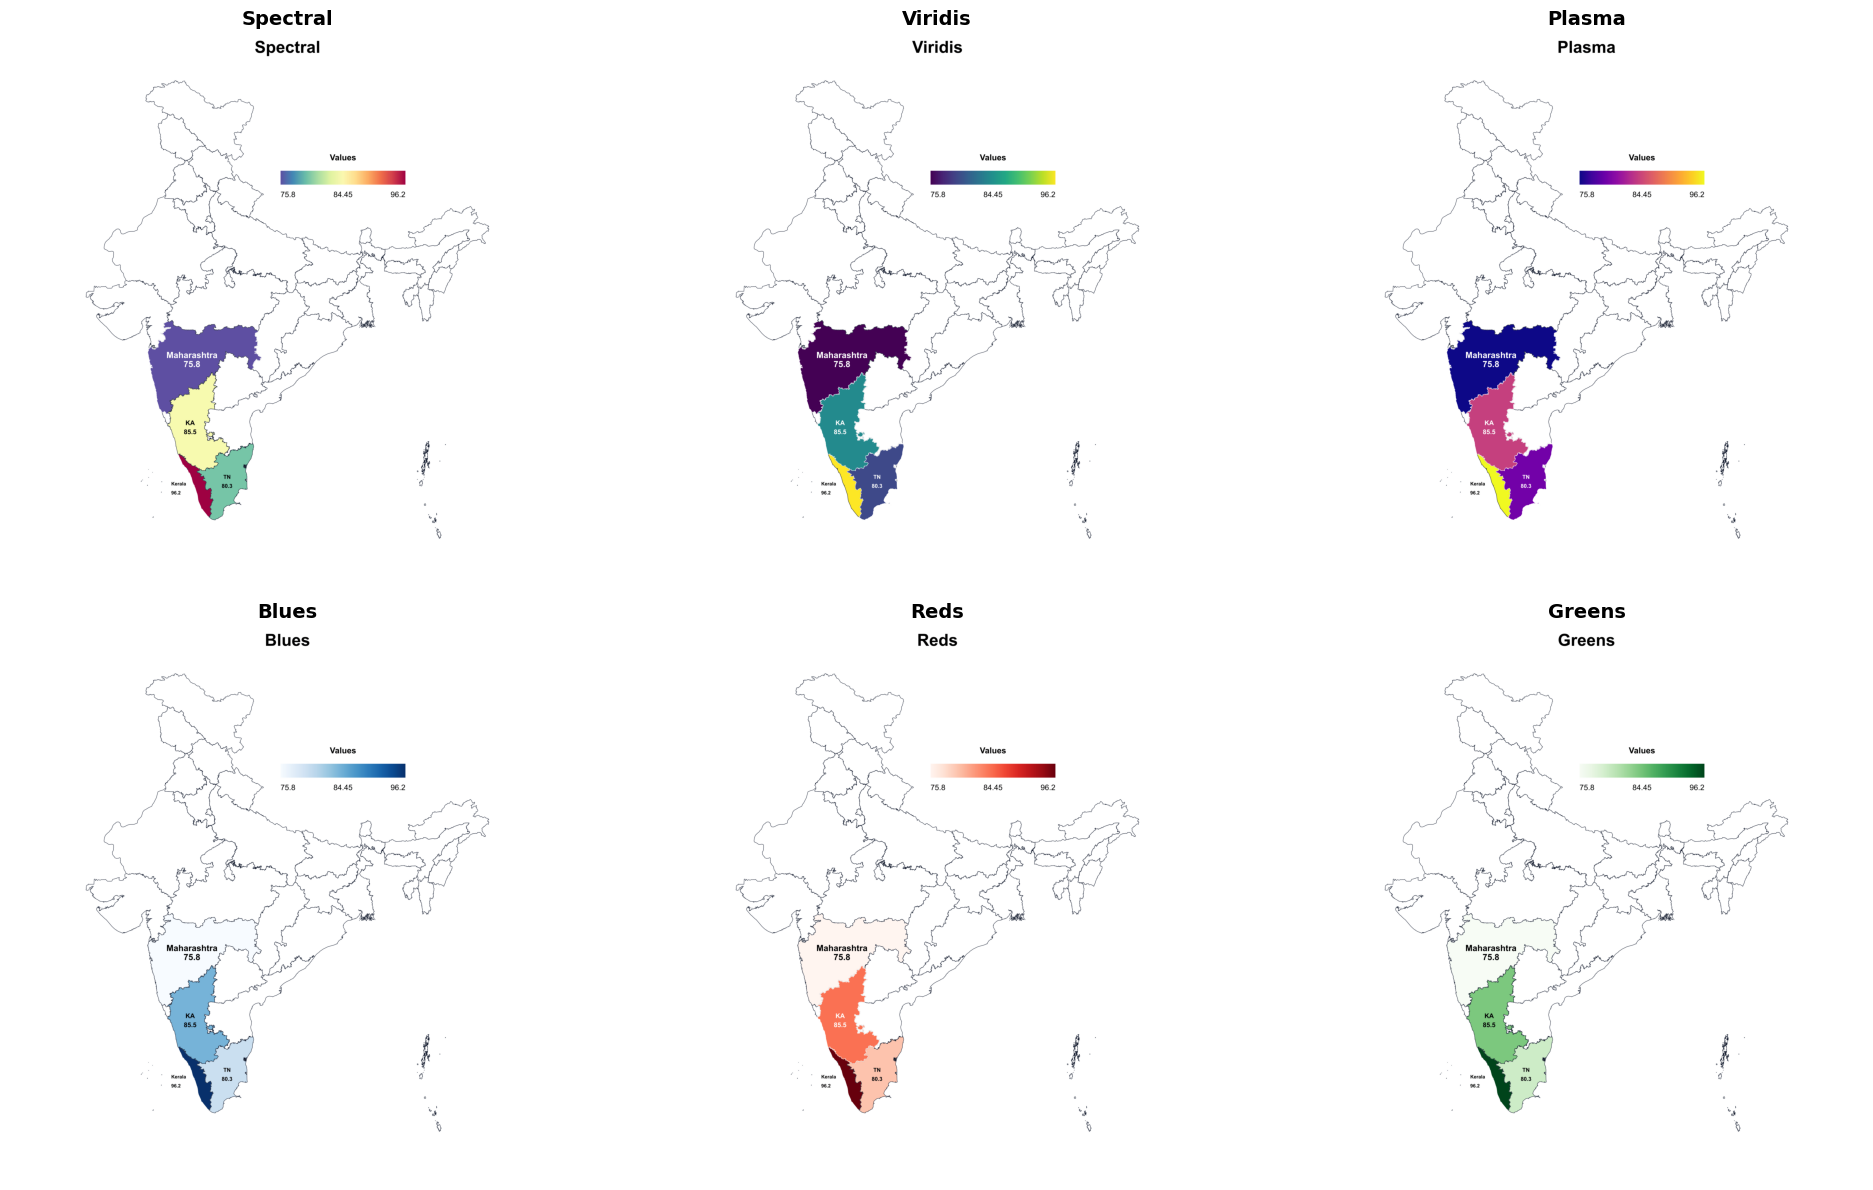

In [8]:
# Compare 6 different color scales
bv.compare_scales(
    data,
    scales=["spectral", "viridis", "plasma", "blues", "reds", "greens"],
    figsize=(20, 12),
)

---

## 6️⃣ Advanced: Customize Everything

Full control over colors, labels, and export formats.

✅ Map saved to: custom_map.png


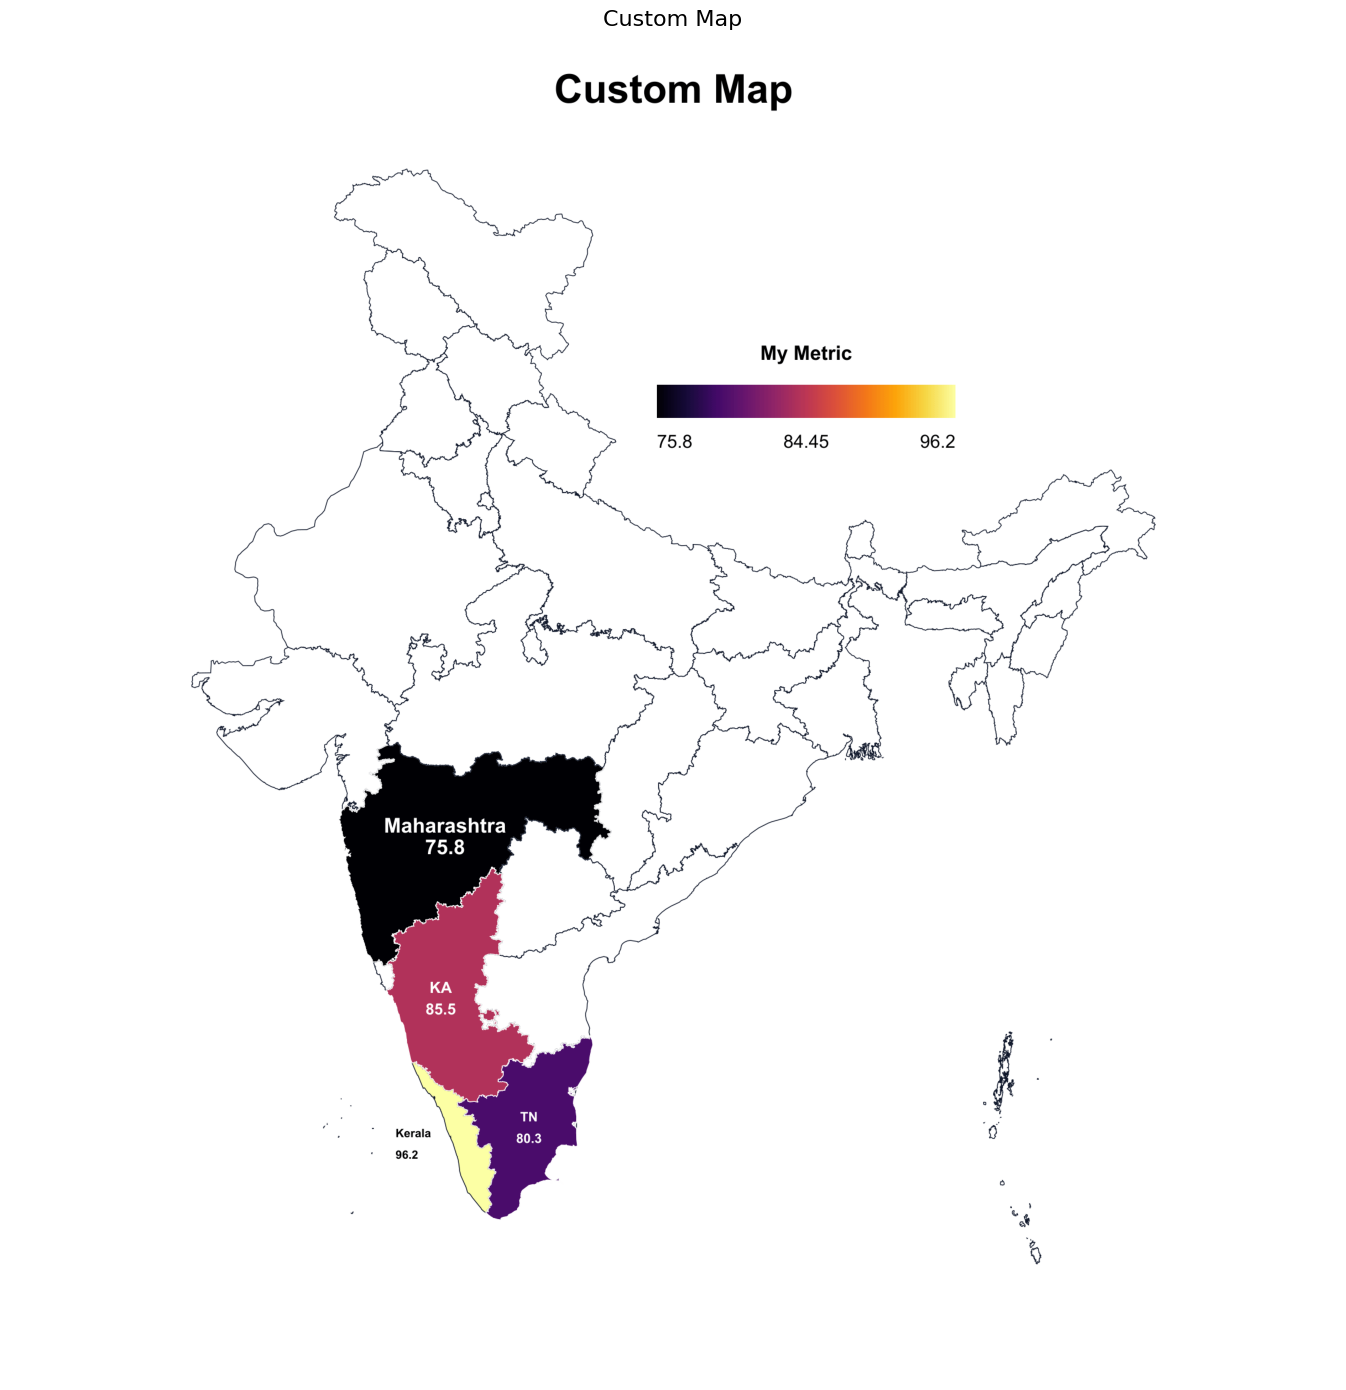


Metadata:
Min: 75.8
Max: 96.2
Mean: 84.45


In [9]:
# All available options
result = bv.generate_map(
    data,
    title="Custom Map",
    legend_title="My Metric",
    color_scale="inferno",
    invert_colors=False,
    hide_state_names=False,
    hide_values=False,
    formats=["png", "svg", "pdf"],
    show=True,
    save_path="custom_map.png",
    return_all=True,  # Get metadata too!
    figsize=(14, 14),
)

# Check metadata
print("\nMetadata:")
print(f"Min: {result['metadata']['minValue']}")
print(f"Max: {result['metadata']['maxValue']}")
print(f"Mean: {result['metadata']['meanValue']}")

---

## 7️⃣ Real World Example - CSV File

Load data from a CSV and visualize it.

In [10]:
# Create sample CSV data
sample_data = pd.DataFrame(
    {
        "State": [
            "Andhra Pradesh",
            "Assam",
            "Bihar",
            "Chhattisgarh",
            "Delhi",
            "Gujarat",
            "Haryana",
            "Himachal Pradesh",
            "Jharkhand",
            "Karnataka",
            "Kerala",
            "Madhya Pradesh",
            "Maharashtra",
            "Odisha",
            "Punjab",
            "Rajasthan",
            "Tamil Nadu",
            "Telangana",
            "Uttar Pradesh",
            "West Bengal",
        ],
        "GDP_Growth": [
            7.8,
            6.5,
            5.9,
            7.2,
            8.9,
            8.1,
            7.5,
            6.8,
            6.2,
            8.3,
            7.9,
            6.7,
            8.5,
            6.4,
            7.1,
            7.3,
            8.7,
            8.2,
            6.8,
            7.6,
        ],
    }
)

# Save to CSV
sample_data.to_csv("state_gdp.csv", index=False)
print("✅ Created state_gdp.csv")

✅ Created state_gdp.csv


✅ Map saved to: gdp_growth_map.png


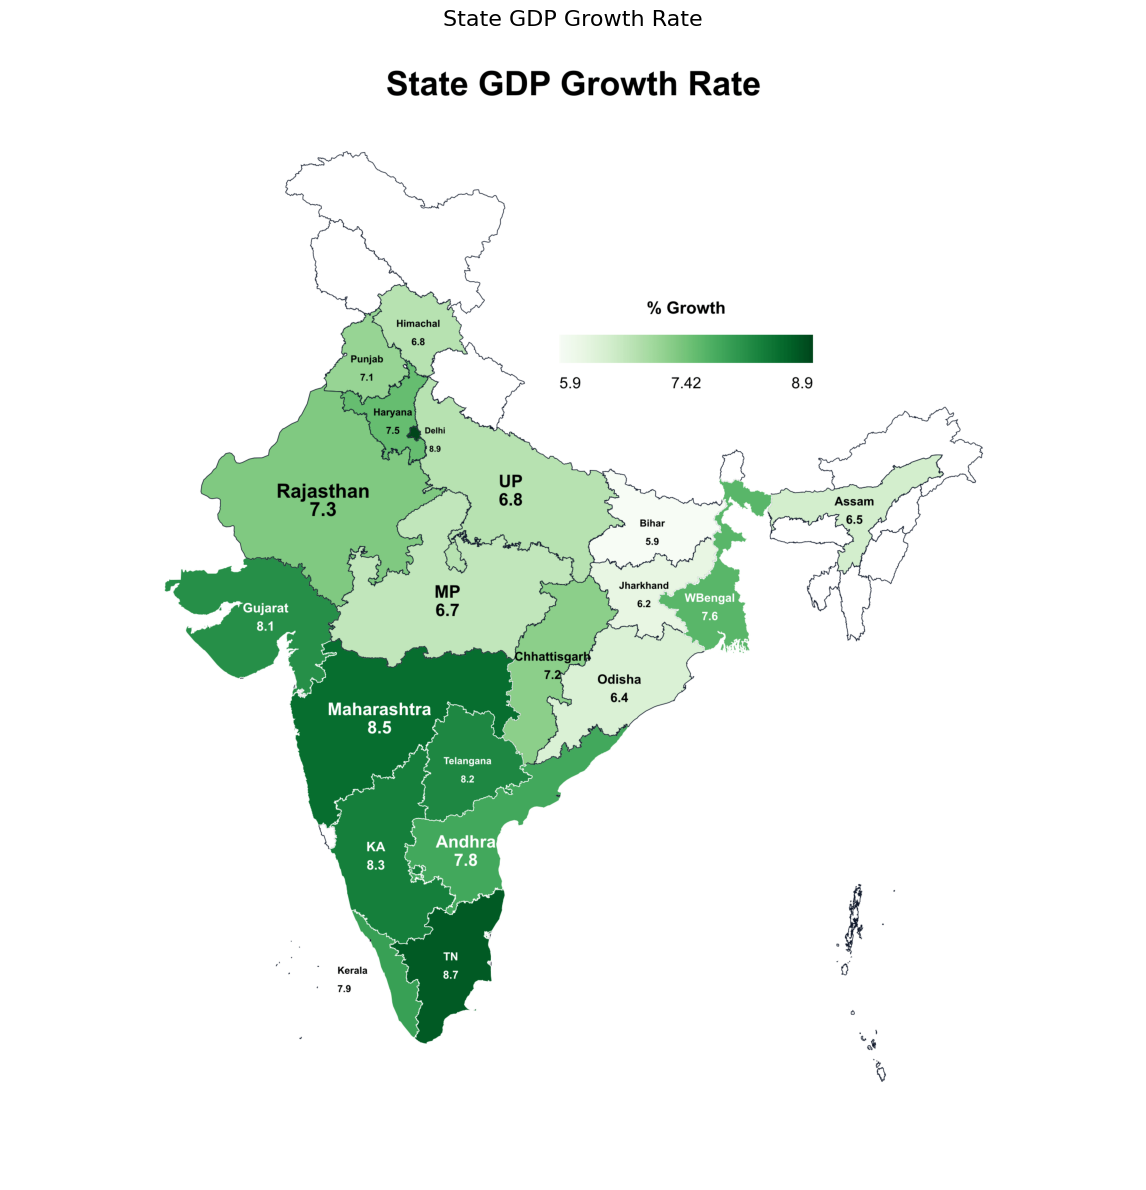

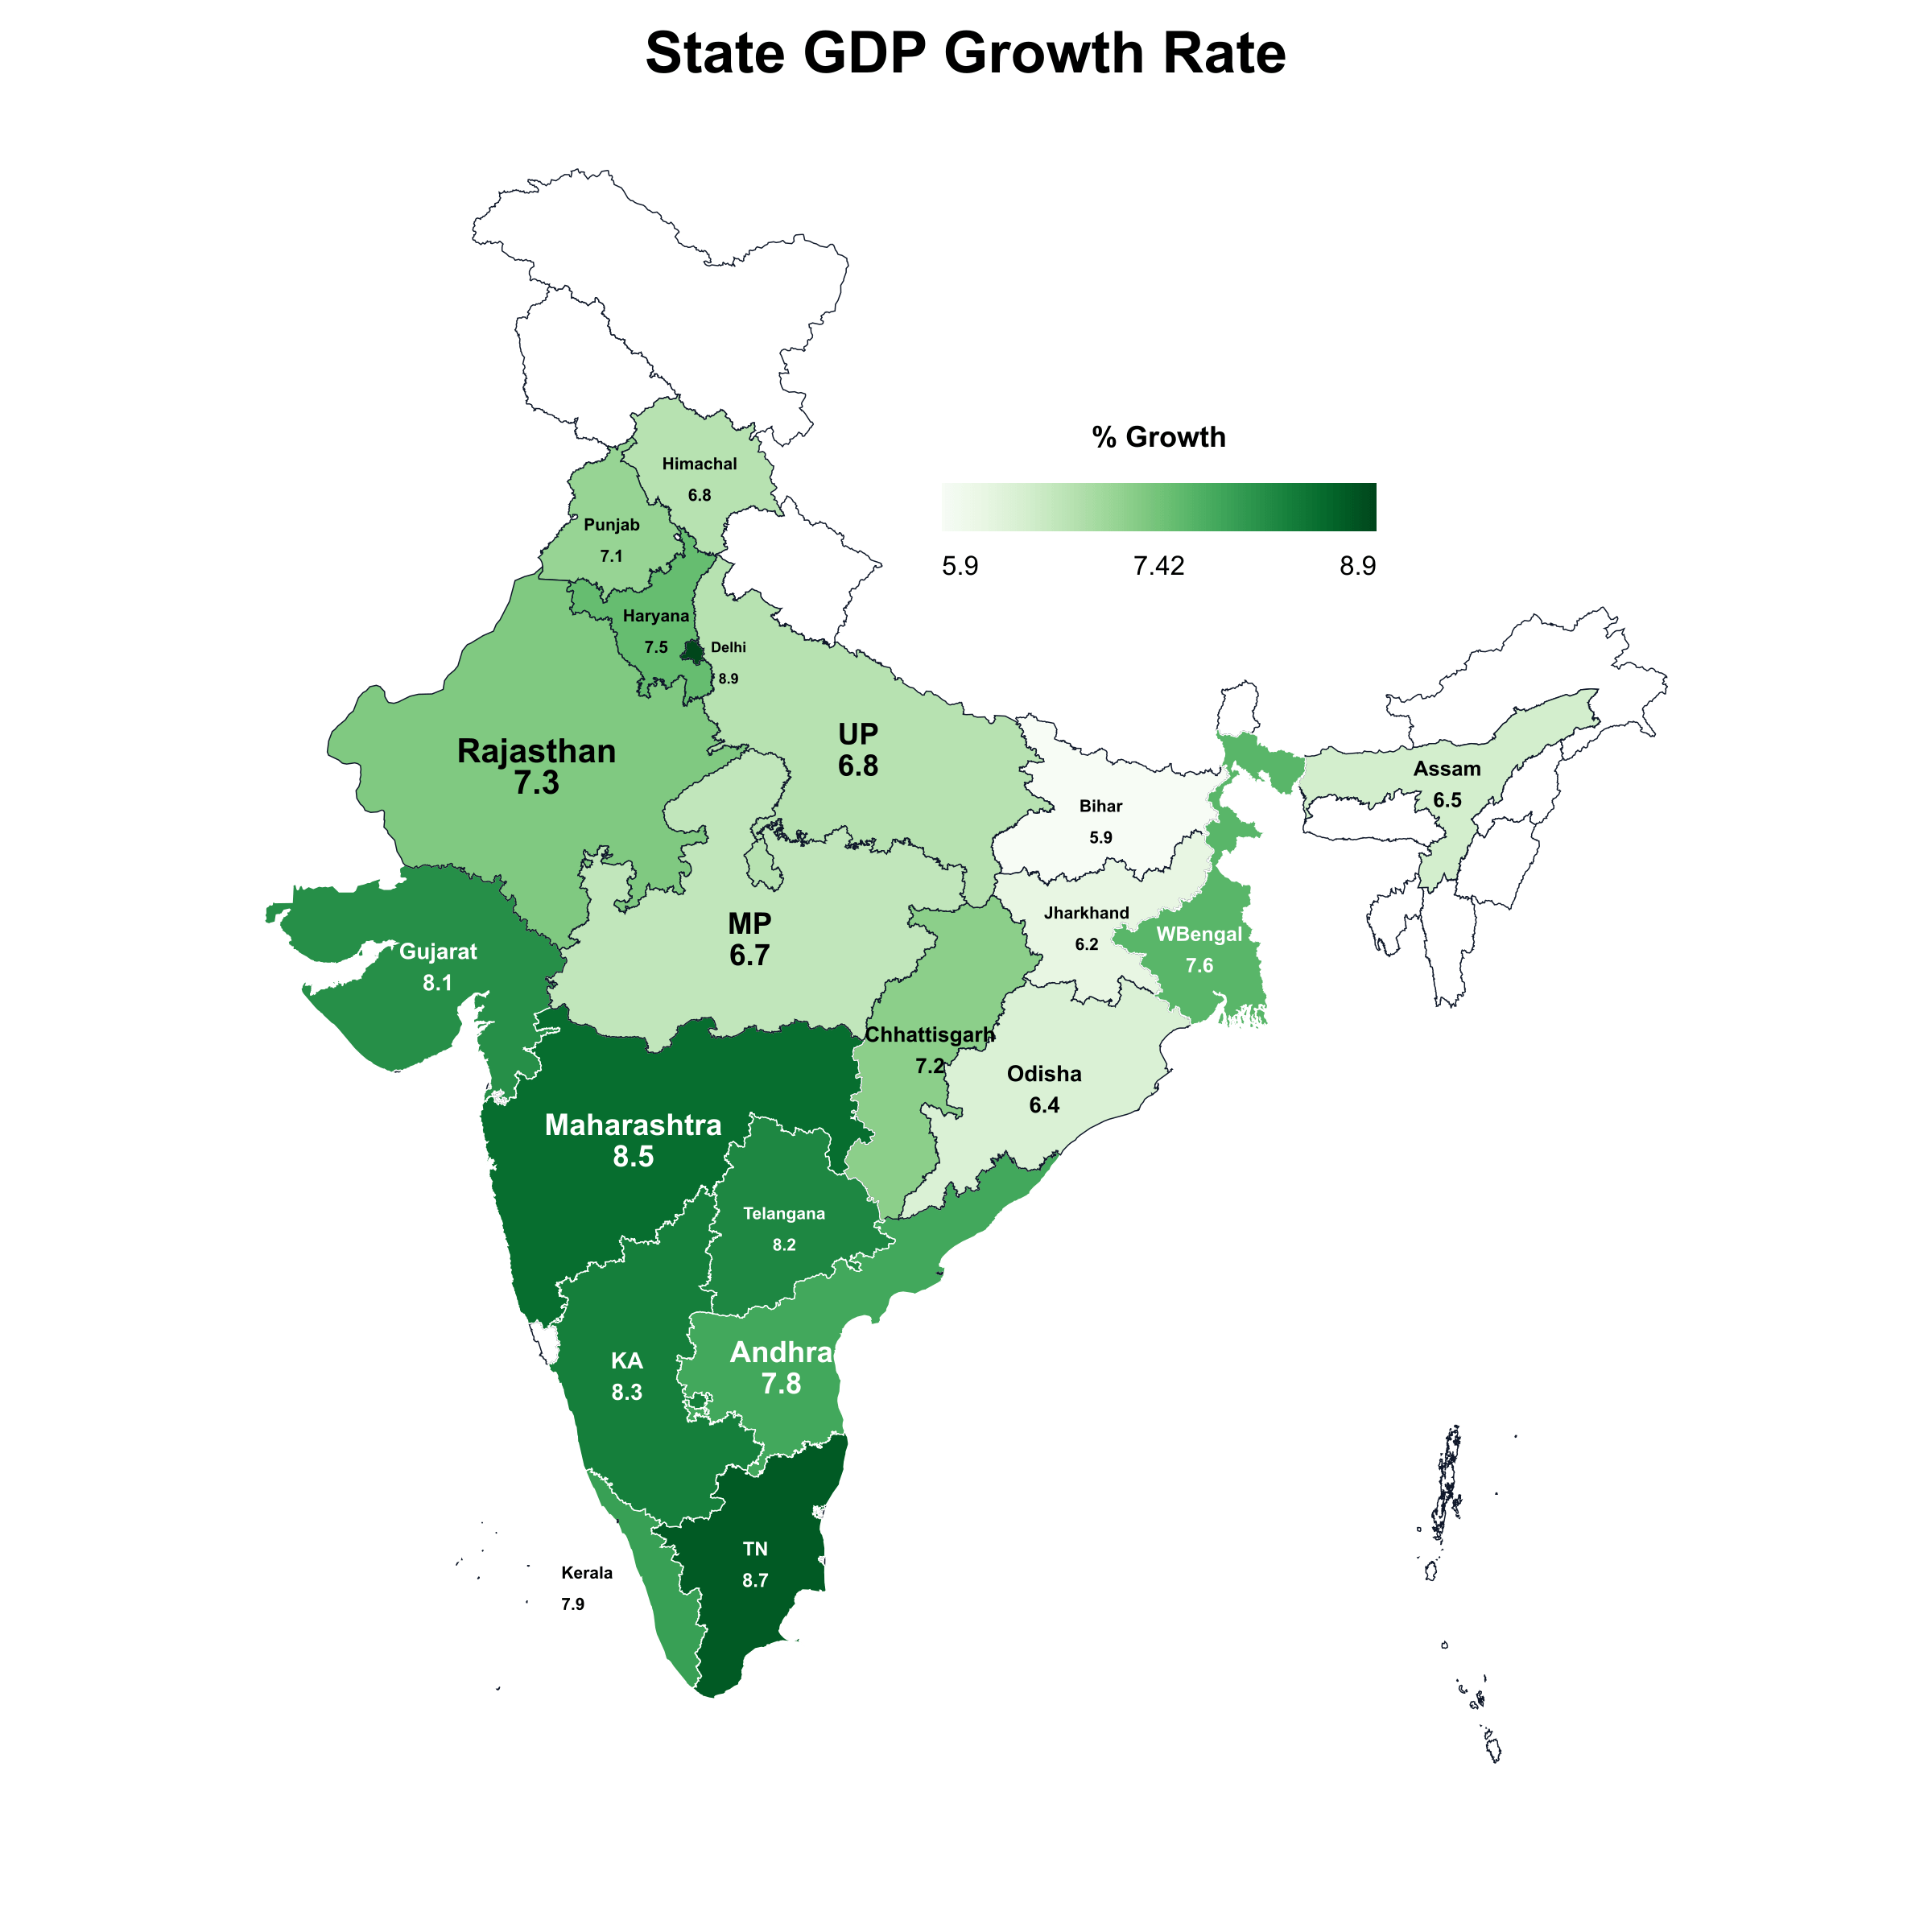

In [11]:
# Load from CSV
df = pd.read_csv("state_gdp.csv")

# Convert and visualize - that's it!
data = BharatViz.from_dataframe(df, "State", "GDP_Growth")

bv.generate_map(
    data,
    title="State GDP Growth Rate",
    legend_title="% Growth",
    color_scale="greens",
    show=True,
    save_path="gdp_growth_map.png",
)

---

## 8️⃣ Pro Tip: Chaining Operations

Combine data processing with visualization in one flow.

In [12]:
# Load, process, and visualize in one go
(
    pd.read_csv("state_gdp.csv")
    .pipe(lambda df: BharatViz.from_dataframe(df, "State", "GDP_Growth"))
    .pipe(
        lambda data: bv.generate_map(
            data, title="GDP Growth (Chained)", color_scale="plasma", show=True
        )
    )
);

AttributeError: 'list' object has no attribute 'pipe'

---

## Available Color Scales

**Sequential:**
- `blues`, `greens`, `reds`, `oranges`, `purples`, `pinks`
- `viridis`, `plasma`, `inferno`, `magma`

**Diverging:**
- `spectral`, `rdylbu`, `rdylgn`, `brbg`, `piyg`, `puor`

## Summary

**Minimal code patterns:**

```python
# From dict
quick_map(BharatViz.from_dict({'Maharashtra': 82.9}), title="Map")

# From DataFrame
bv.generate_map(df, show=True)

# Save
bv.generate_map(data, save_path="map.png")

# Save all formats
bv.save_all_formats(data, basename="map")

# Compare colors
bv.compare_scales(data)
```

That's it! 🎉